Dieses Skript visualisiert die Anzahl der Artefakte je Montage.

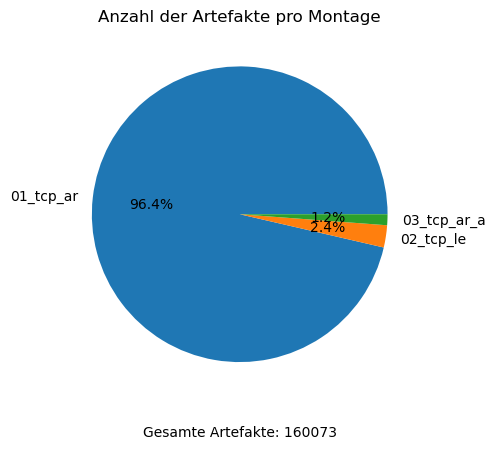

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os


artifacts_per_montage = {
    '01_tcp_ar': 0,
    '02_tcp_le': 0,
    '03_tcp_ar_a': 0
}


for root, dirs, files in os.walk('../../../../tuar/edf/'):
    for file in files:
        if file.endswith('.csv') and not '_seiz' in file:
            df = pd.read_csv(os.path.join(root, file), comment='#')
            montage = root.split('/')[-1]
            artifacts_per_montage[montage] += len(df)

plt.title('Anzahl der Artefakte pro Montage')
plt.pie(artifacts_per_montage.values(), labels=artifacts_per_montage.keys(), autopct='%1.1f%%')
plt.annotate(f'Gesamte Artefakte: {sum(artifacts_per_montage.values())}', xy=(0.5, -0.1), xycoords='axes fraction', ha='center')
plt.savefig("./output/exp_01_03_artifacts_per_montage.svg")
plt.show()

- Notizen
    - Temporal Central Parasagittal (TCP) Averaged Reference (AR) Montage am dominantesten (bipolar)
    - Temporal Central Parasagittal (TCP) Linked Ears Reference (LE) Montage mit 2,4% (bipolar)
    - Temporal Central Parasagittal (TCP) Averaged Reference (AR) Montage mit 1,2% (**nur 20 Kanäle**)
    - Artefakte und Daten wurden in der selben Montage erstellt/aufgezeichnet
    - Bei tcp_ar und tcp_le werden die selben Kanäle verwendet (Unterschiede sind nur tcp_le hat Kanal für EKG, bestimmt Potenzial mit LE Elektrode während tcp_ar mit REF Elektrode)
    - tcp_ar_a fehlt im Vergleich zu tcp_ar die Kanäle `T4-A2` und `A1-T3`